# Pengenalan

### Member Tim:
- Achmad Dhani
- Faris Arief Mawardi

PIC Media: Dhani

----

## Kode Scraping

```python

def get_element_text(element, value, value_type="class"):
    item = element.find(attrs={value_type: value})
    return item.text if item else None

def get_data(parent_tag_, day_, month_):
    data = [{
    'Headline' : get_element_text(el,'n0jPhd ynAwRc MBeuO nDgy9d', 'class'),
    'Media' : get_element_text(el, 'MgUUmf NUnG9d', 'class'),
    'Date' : f"{day_}/{month_}/2023",
    'url': el.find("a", {"class":"WlydOe"})['href']
    } for el in parent_tag_]
    return data

scrape_data= []

def scraping(month, day):
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(options=chrome_options)

    url=f"https://www.google.com/search?q=prabowo+gibran&sca_esv=590380016&biw=1710&bih=953&sxsrf=AM9HkKl2jyc3pgk2OS3bmHnxuxjCN9ANBw%3A1702718802779&source=lnt&tbs=sbd%3A1%2Ccdr%3A1%2Ccd_min%3A{month}%2F{day}%2F2023%2Ccd_max%3A{month}%2F{day}%2F2023&tbm=nws"
    driver.get(url)
    sleep(2)
    html = driver.page_source 
    soup = bs(html, "html.parser")
    main_tag = soup.find_all("div", {"class": "SoaBEf"})
    first_data= get_data(main_tag, day, month)
    scrape_data.extend(first_data)
    link= soup.find('a', id="pnnext")['href']

    while True:
        driver.get('https://www.google.com' + link)
        sleep(2)
        html = driver.page_source
        soup = bs(html, "html.parser")
        loop_tag = soup.find_all("div", {"class": "SoaBEf"})
        next_data = get_data(loop_tag, day, month)
        scrape_data.extend(next_data)
        try:
            link= soup.find('a', id="pnnext")['href']
        except TypeError:
            break
    driver.quit()
```

Kode diatas digunakan untuk scraping/mengambil data berita dari Google Search dengan kata kunci pencarian **Prabowo Gibran**

----

# Visualisasi Sample

## Teknis

### Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from matplotlib.dates import DateFormatter, AutoDateLocator

### Load Data

In [151]:
df = pd.read_csv('./media_analysis/hasil_akhir.csv', delimiter=';')

In [153]:
df['tanggal_publikasi'] = pd.to_datetime(df['tanggal_publikasi'], format='%d/%m/%Y')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   judul_berita       2121 non-null   object        
 1   portal_media       2121 non-null   object        
 2   tanggal_publikasi  2121 non-null   datetime64[ns]
 3   url                2121 non-null   object        
 4   hasil_sentimen     2121 non-null   object        
 5   olahan_teks        2121 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 99.5+ KB


---

## Analisis Data

### Informasi Tentang Data

In [22]:
df.shape

(2121, 6)

Didapatkan sebanyak 2121 jumlah data berita yang dipublikasi dalam rentang waktu tanggal 15 november - 15 desember

In [79]:
df.select_dtypes(include='object').describe()

,judul_berita,portal_media,url,hasil_sentimen,olahan_teks
count,2121,2121,2121,2121,2121
unique,2113,527,2121,3,2102
top,Kementerian Komunikasi dan Informatika,detikNews,https://www.cnbcindonesia.com/news/20231115130...,netral,menteri komunikasi informatika
freq,3,92,1,1925,3


berdasarkan data deskriptif:
- terdapat beberapa berita dengan judul berita yang sama
- terdapat 527 portal media termasuk branchnya
- Setimen paling banyak adalah sentimen netral yang mencakup 1925 berita

In [140]:
pd.set_option('display.max_colwidth', None) 

In [142]:
df[df['hasil_sentimen'] == 'positif'][['judul_berita', 'hasil_sentimen']].sample(10)

,judul_berita,hasil_sentimen
2084,Terungkap! Gus Miftah Beberkan Alasan Prabowo Tak Mau Permalukan Anies saat \nDebat Capres Meski Diserang,positif
2000,"Mengaku Tak Punya Apa-apa, Prabowo Justru Paling Tajir di Antara \nCapres-Cawapres - Kompas.com",positif
1794,IJU Optimis Prabowo-Gibran Mampu Lanjutkan Program Jokowi,positif
441,Politik Gemoy ala Prabowo-Gibran,positif
873,"Dukungan Jokowi, SBY Hingga Luhut Perbesar Peluang ...",positif
237,Rekomendasi Film Animasi Terbaik Karya Studio Ghibli,positif
1088,"Miliki Basis Kuat, Prabowo-Gibran Dinilai Mampu Raup 60 Persen Suara Jabar",positif
1889,"Pemimpin Bijak dan Rendah Hati, Perolehan Elektabilitas Prabowo Dinilai \nAkan Tetap Tinggi",positif
1497,Relawan Pedagang Indonesia Maju Deklarasi Dukung ...,positif
1433,"Utamakan Rakyat, Prabowo dinilai Perhatian Terhadap Persoalan Akar Rumput",positif


In [143]:
df[df['hasil_sentimen'] == 'netral'][['judul_berita', 'hasil_sentimen']].sample(10)

,judul_berita,hasil_sentimen
1259,"Jokowi Resmikan Gereja Katedral di Kupang, Harap Bisa Pererat Persaudaraan \ndan Kerukunan",netral
1182,Prabowo-Gibran Berkomitmen Sediakan Rumah Murah untuk ...,netral
1390,AHY optimistis kemenangan Prabowo-Gibran di Pilpres 2024,netral
840,TPN: Ganjar-Mahfud punya concern terhadap kesejahteraan guru ngaji,netral
1818,Relawan Minta Prabowo-Gibran Terapkan Hari Cuti Ayah-Ibu Jika Menang,netral
771,Freddy Siap Menangkan Prabowo-Gibran dan Demokrat di ...,netral
20,"Gerindra Akui Sulit Menang di Jateng, Tapi... - Kompas.com",netral
2025,Program Makan Siang Prabowo-Gibran Dinanti Anak-anak di Timur Indonesia,netral
1949,"Kampanye Prabowo-Gibran di Sumsel 'Cancel', Begini Kata Ketua TPD KIM \nMawardi Yahya",netral
1570,Gus Miftah dan Bupati Kendal Kampanyekan Prabowo ...,netral


In [144]:
df[df['hasil_sentimen'] == 'negatif'][['judul_berita', 'hasil_sentimen']].sample(10)

,judul_berita,hasil_sentimen
1022,"Puji Prabowo dan Gibran Rakabuming, SBY Disebut Dokter Tifa Bak Telah \nDibodohi: Padahal Jendral Gemilang - Kilat",negatif
707,"Gibran Sering Absen Debat, Kapasitasnya Dipertanyakan",negatif
1327,"Soal Dugaan Pro ke Prabowo-Gibran, Polri ke Media: Jangan Diframing!",negatif
866,Trending! TKN Tanggapi Foto AI Gemoy Prabowo-Gibran Pakai Atribut LGBT: \nFitnah! - Radar Kudus,negatif
25,CEK FAKTA: Hoaks KPU Batalkan Gibran Jadi Cawapres ...,negatif
818,"Cawapres Gibran Rakabuming Dihujat dengan Kata-kata Kasar oleh Netizen di \nTwitter, Ada Apa? - Kilat",negatif
1000,"Dituding Buat Foto Prabowo-Gibran Pakai Pin dan Dasi LGBT, Ketua TKN: Itu \nHoax",negatif
1529,"Menggelikan! Roy Suryo Kian Sindir Lulusan Gibran Rakabuming, Bandingkan \nNama Universitas sang Cawapres dengan Brand Produk Pria Ini - Kilat",negatif
1964,"TKN Prabowo-Gibran Kritik Format Debat Capres, Kenapa?",negatif
736,"Arahan Prabowo-Gibran ke TKN dan TKD, Tak Boleh Jelek-jelekan Paslon Lain - \nKompas.com",negatif


- Terdapat berita-berita yang tidak relevan yang perlu di cleaning

### Visualisasi 10 Portal Media Terbesar

In [80]:
top10media= df['portal_media'].value_counts().reset_index(name='jumlah_publikasi').head(10)

In [81]:
top10media

,portal_media,jumlah_publikasi
0,detikNews,92
1,Antaranews.com,90
2,KOMPAS.com,87
3,Politik,78
4,Liputan6.com,62
5,Nasional,57
6,detikcom,54
7,Tribun Jabar,47
8,CNN Indonesia,47
9,Merdeka.com,36


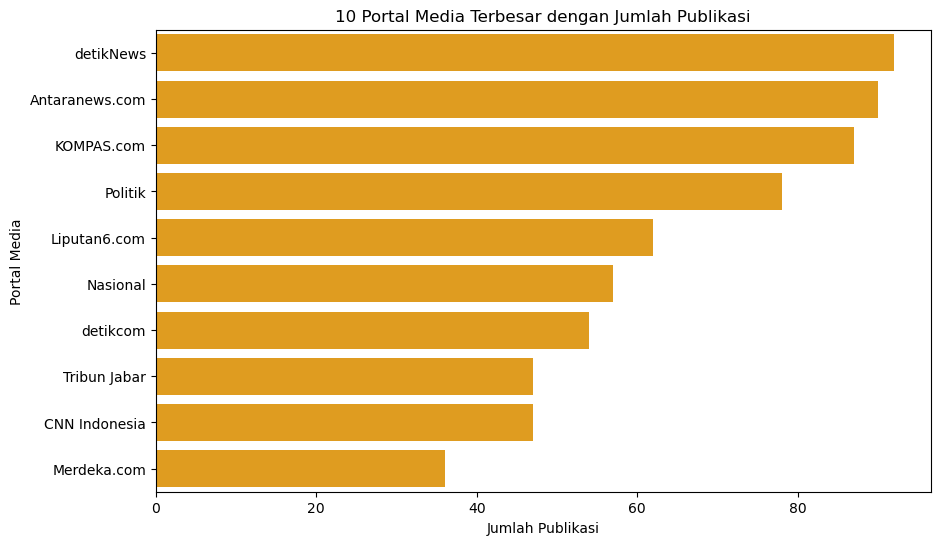

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_publikasi', y='portal_media', data=top10media, color='orange')

plt.xlabel('Jumlah Publikasi')
plt.ylabel('Portal Media')
plt.title('10 Portal Media Terbesar dengan Jumlah Publikasi')
plt.show()

Visualisasi ini dapat membantu mengetahui media portal mana yang paling aktif dalam menulis berita mengenai prabowo gibran beserta jumlah publikasinya dalam kurun waktu kurang lebih 1 bulan

### Visualisasi Sentimen

In [85]:
total_sentimen= df['hasil_sentimen'].value_counts().reset_index(name='jumlah_berita')

In [86]:
total_sentimen

,hasil_sentimen,jumlah_berita
0,netral,1925
1,negatif,135
2,positif,61


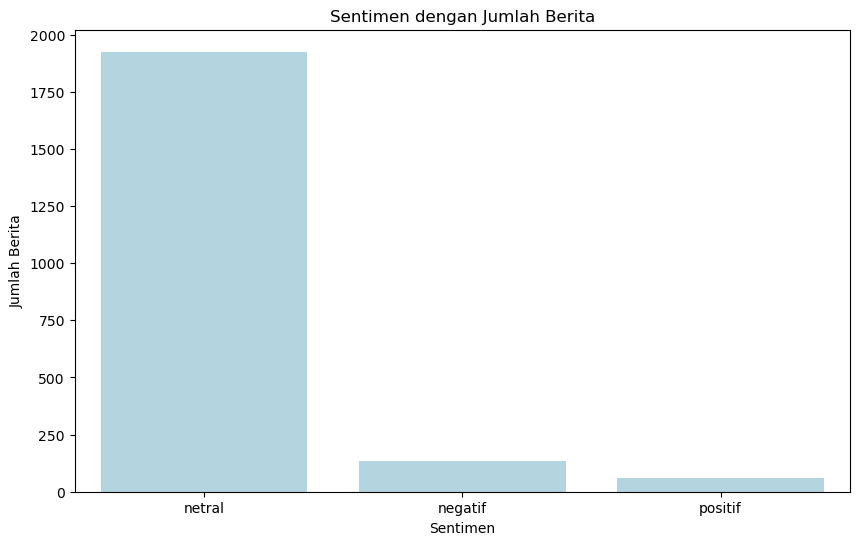

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hasil_sentimen', y='jumlah_berita', data=total_sentimen, color='lightblue')

plt.xlabel('Sentimen')
plt.ylabel('Jumlah Berita')
plt.title('Sentimen dengan Jumlah Berita')
plt.show()

Visualisasi ini membantu mendapatkan informasi mengenai jumlah sentimen dari seluruh jumlah berita. Dari data sampel didapatkan berita paling banyak merupakan sentimen netral.

### Visualisasi Media degan Publikasi Sentimen Positif

In [121]:
media_positif= df[df['hasil_sentimen'] == 'positif']['portal_media'].value_counts().head(3).reset_index(name='jumlah_berita')
media_positif

,portal_media,jumlah_berita
0,Tribun Jabar,8
1,Tribunnews.com,3
2,RILIS ID,2


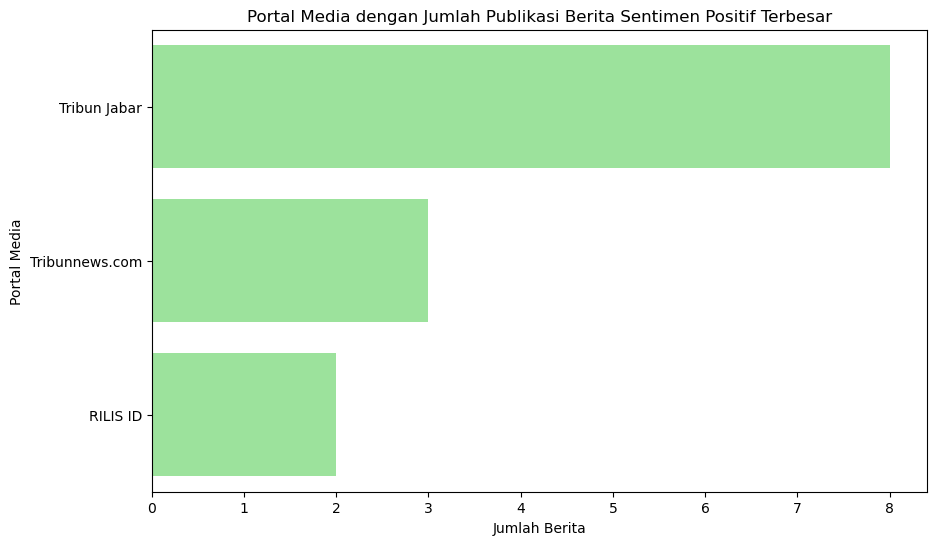

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_berita', y='portal_media', data=media_positif, color='lightgreen')
plt.xlabel('Jumlah Berita')
plt.ylabel('Portal Media')
plt.title('Portal Media dengan Jumlah Publikasi Berita Sentimen Positif Terbesar')
plt.show()

Secara spesifik dapat ditelusuri media portal yang paling banyak mengpublikasikan berita dengan setimen positif adalah:
1. Tribun Jabar
2. Tribunnews.com
3. Rilis ID

### Visualisasi Media degan Publikasi Sentimen Netral

In [128]:
media_netral= df[df['hasil_sentimen'] == 'netral']['portal_media'].value_counts().head(3).reset_index(name='jumlah_berita')
media_netral

,portal_media,jumlah_berita
0,Antaranews.com,88
1,detikNews,87
2,KOMPAS.com,83


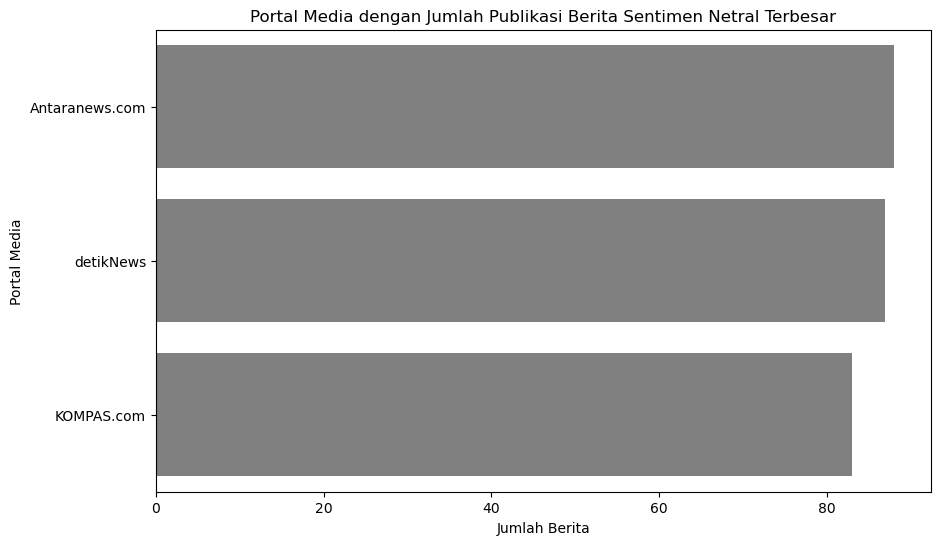

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_berita', y='portal_media', data=media_netral, color='grey')
plt.xlabel('Jumlah Berita')
plt.ylabel('Portal Media')
plt.title('Portal Media dengan Jumlah Publikasi Berita Sentimen Netral Terbesar')
plt.show()

Setelah ditelusuri secara spesifik, portal media dengan publikasi berita dengan sentimen netral paling banyak adalah:
1. Antaranews.com
2. detikNews
3. KOMPAS.com

### Visualisasi Media degan Publikasi Sentimen Negatif

In [133]:
media_negatif= df[df['hasil_sentimen'] == 'negatif']['portal_media'].value_counts().head(3).reset_index(name='jumlah_berita')
media_negatif

,portal_media,jumlah_berita
0,Kilat,10
1,JPNN.com,5
2,KOMPAS.tv,5


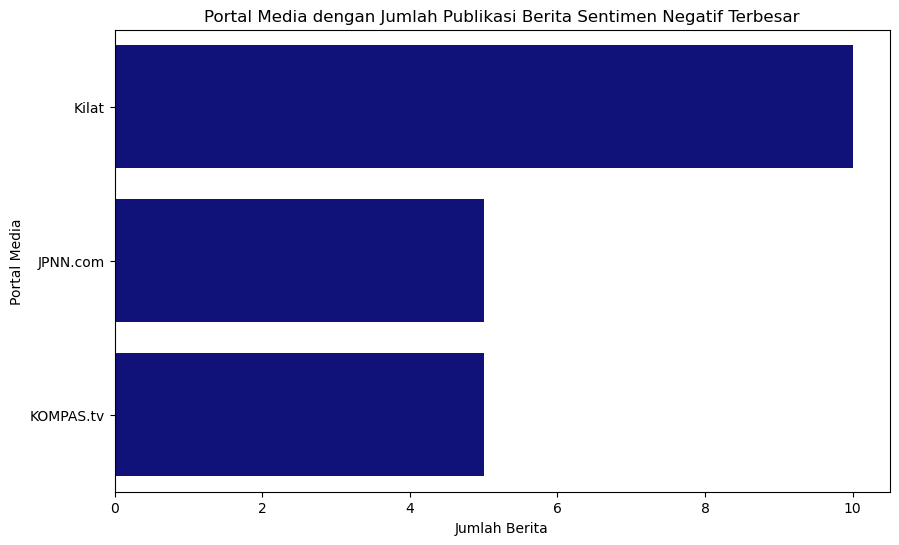

In [147]:
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_berita', y='portal_media', data=media_negatif, color='darkblue')
plt.xlabel('Jumlah Berita')
plt.ylabel('Portal Media')
plt.title('Portal Media dengan Jumlah Publikasi Berita Sentimen Negatif Terbesar')
plt.show()

Setelah ditelusuri, portal media dengan publikasi berita dengan sentimen netral paling banyak adalah:
1. Kilat
2. JPNN.com
3. KOMPAS.tv

### Visualisasi Jumlah Berita berdasarkan Tanggal

In [89]:
berita_tanggal= df.groupby('tanggal_publikasi')['judul_berita'].count().reset_index(name='jumlah_publikasi')

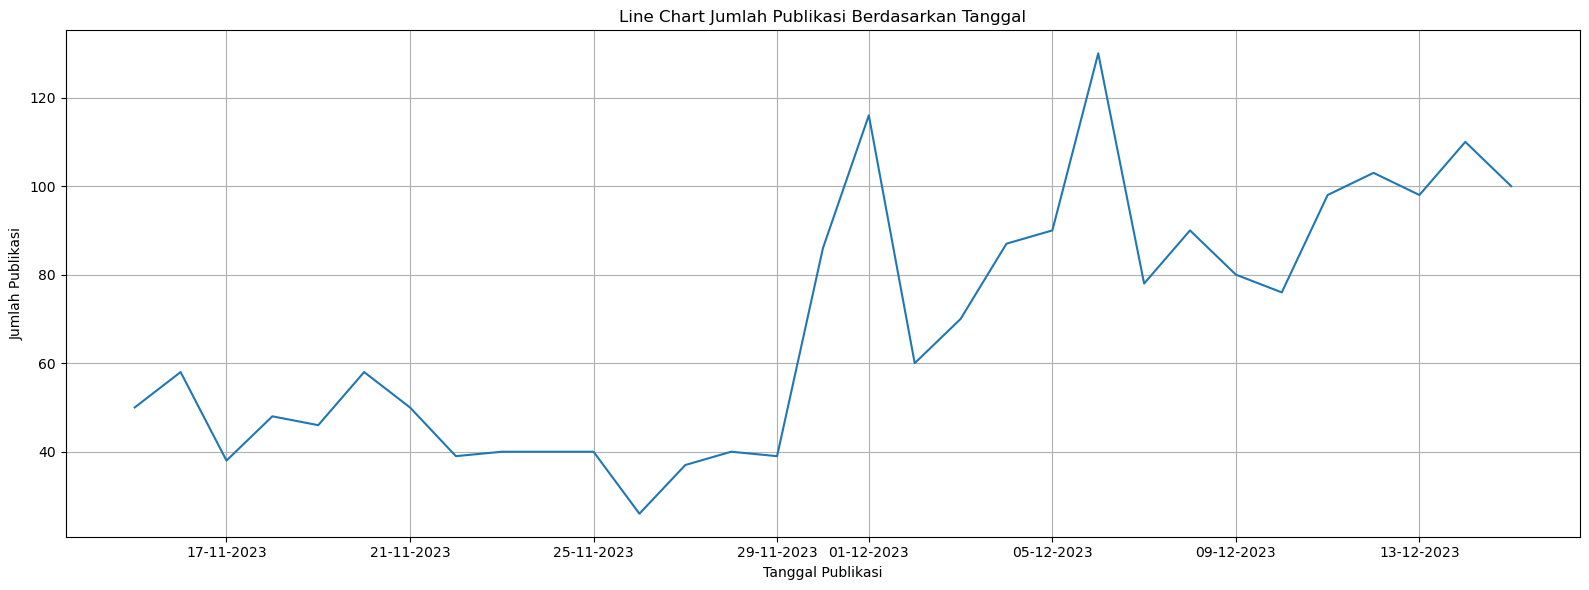

In [90]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='tanggal_publikasi', y='jumlah_publikasi', data=berita_tanggal, )

date_format = DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Tanggal Publikasi')
plt.ylabel('Jumlah Publikasi')
plt.title('Line Chart Jumlah Publikasi Berdasarkan Tanggal')
plt.grid(True)
plt.tight_layout() 
plt.show()

Visualisasi berdasarkan tanggal dapat membantu mengetahui informasi jumlah berita / harinya dan trend yang terbentuk. Terlihat terdapat trend jumlah berita yang dipublisasikan naik dari tanggal 30 november. 

### Visualisasi WordCloud

In [91]:
# using counter to count the number of words
words = [word for text in df['olahan_teks'] for word in text.split()]

word_freq = Counter(words) # count of each word

In [92]:
print(word_freq)

Counter({'prabowo': 1665, 'gibran': 1608, 'menang': 300, 'tkn': 285, 'dukung': 280, 'kampanye': 174, 'ganjar': 158, 'com': 134, 'pilpres': 129, 'jokowi': 122, 'tkd': 122, 'capres': 117, 'rawan': 114, 'debat': 113, 'kompas': 108, 'anies': 104, 'mahfud': 99, 'cawapres': 92, 'indonesia': 89, 'suara': 88, 'ketua': 85, 'survei': 83, 'pilih': 81, 'tim': 80, 'deklarasi': 75, 'putar': 71, 'target': 62, 'muda': 59, 'program': 58, 'politik': 53, 'rakabuming': 52, 'hadir': 51, 'jabar': 50, 'jatim': 48, 'gerindra': 47, 'pasang': 45, 'elektabilitas': 44, 'partai': 42, 'radar': 42, 'gelar': 41, 'nilai': 40, 'amin': 39, 'subianto': 39, 'maju': 38, 'gratis': 38, 'janji': 37, 'cak': 37, 'pdip': 36, 'kader': 36, 'bicara': 35, 'gemoy': 35, 'masyarakat': 35, 'susu': 34, 'kota': 34, 'alas': 34, 'hasil': 33, 'jakarta': 32, 'milenial': 32, 'golkar': 32, 'kuat': 31, 'bawaslu': 31, 'pimpin': 31, 'milu': 31, 'unggul': 30, 'ajak': 30, 'kilat': 30, 'kpu': 29, 'jateng': 26, 'banten': 26, 'desa': 26, 'perdana': 26,

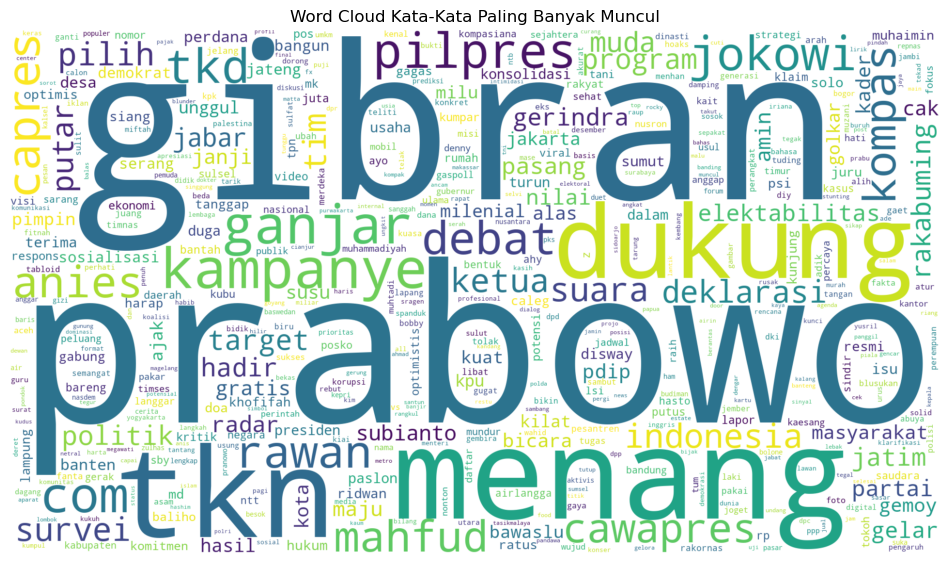

In [97]:
kata_wordcloud = WordCloud(width=1920, height=1080,
                      max_words= 500,
                      background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))

# Display the word cloud
plt.imshow(kata_wordcloud, interpolation='bilinear')
plt.title('Word Cloud Kata-Kata Paling Banyak Muncul')
plt.axis('off')

plt.show()

Visualisasi wordcloud membantu memperlihatkan kata-kata yang paling banyak muncul untuk mengetahui trend yang ada

---

# Penemuan Data

- Terdapat judul berita yang duplikat
    - perlu di cek dengan mengunjungi URLnya
- Terdapat divisi media yang perlu disatukan dengan induk portalnya

----

# Tantangan

- Struktur HTML dapat berubah setiap kata kunci yang digunakan dalam Google Search sehingga perlu di optimasi kode scraping untuk setiap kata kunci
- Kode belum paling efisien karena setiap ganti hari ketika scraping perlu menutup dan membuka kembali browser
- Pengolahan teks membutuhkan waktu jika diperlukan
- Pembersihan data berita yang tidak relevan

---

# Kesimpulan